# Checkpoint 1
Project Name: **Once More! An iterative text revision model**


Implementation, testing and analysis of "Understanding Iterative Revision from Human-Written Text" by Wanyu Du et al.


Team
* Pratish Mashankar G#: G01354094
* William J David G#: G01129185
* Sai Likhitha Allanki G#: G01336091

Git Repo: https://github.com/PratishMashankar/cs678cp1.git

## README
The following code tests the Wanyu Du et al's code and implements new models to check the performance. We first show the plots of our outputs and then the code. The work flow entitles as below:

1.   Cloning Git repo
2.   Using requirements.txt to download the necessary libraries
3. Testung Wanyu Du et al. ROBERTA model for intent classifcation and proposing DistilBERT as a faster (but less accurate) approach. We also check on multiple epochs as against the suggested 15 epochs
4. Testing the PEGASUS and BART models for edit generation using 15 epochs


## Result Graphs

<ipython-input-4-49f41c31ad0c>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


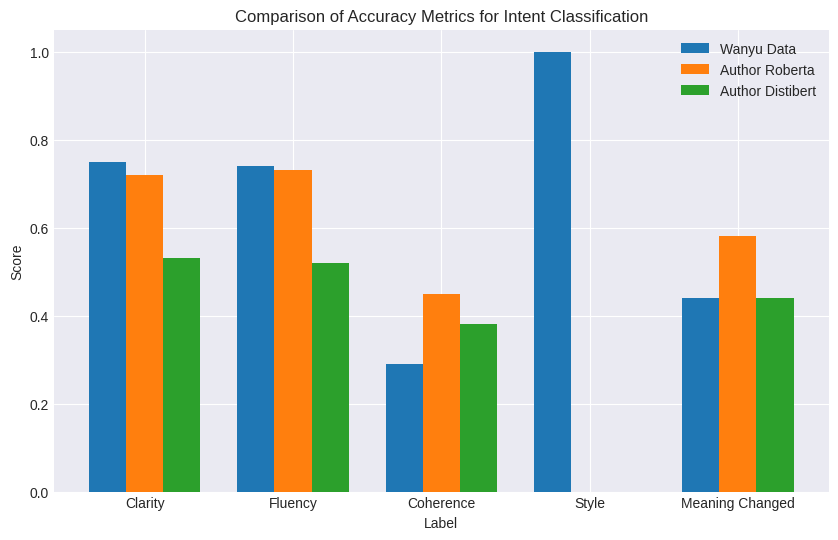

In [ ]:
#Task1: Intent Classification and Prediction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dataframes
wanyu_data = pd.DataFrame({'Label': ['Clarity', 'Fluency', 'Coherence', 'Style', 'Meaning Changed'],
                           'Precision': [0.75, 0.74, 0.29, 1.0, 0.44],
                           'Recall': [0.63, 0.86, 0.36, 0.07, 0.69],
                           'F1': [0.69, 0.80, 0.32, 0.13, 0.53]})

author_roberta = pd.DataFrame({'Label': ['Clarity', 'Fluency', 'Coherence', 'Style', 'Meaning Changed'],
                               'Precision': [0.72, 0.73, 0.45, 0.0, 0.58],
                               'Recall': [0.72, 0.82, 0.34, 0.0, 0.62],
                               'F1': [0.72, 0.77, 0.38, 0.0, 0.58]})

author_distibert = pd.DataFrame({'Label': ['Clarity', 'Fluency', 'Coherence', 'Style', 'Meaning Changed'],
                                 'Precision': [0.53, 0.52, 0.38, 0.0, 0.44],
                                 'Recall': [0.52, 0.71, 0.11, 0.0, 0.49],
                                 'F1': [0.53, 0.60, 0.17, 0.0, 0.46]})

# Set plot style
plt.style.use('seaborn-darkgrid')

# Set bar width
bar_width = 0.25

# X axis values
x = np.arange(len(wanyu_data))

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width, wanyu_data['Precision'], width=bar_width, label='Wanyu Data')
ax.bar(x, author_roberta['Precision'], width=bar_width, label='Author Roberta')
ax.bar(x + bar_width, author_distibert['Precision'], width=bar_width, label='Author Distibert')

# Add labels, title, and legend
ax.set_xlabel('Label')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy Metrics for Intent Classification')
ax.set_xticks(x)
ax.set_xticklabels(wanyu_data['Label'])
ax.legend()

# Display plot
plt.show()


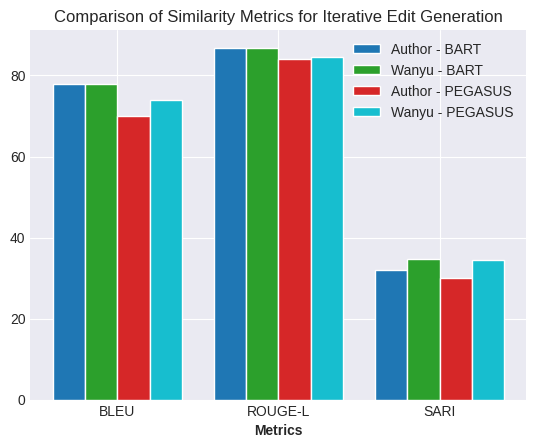

In [ ]:
#Task2: Iterative Edit Generation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrames
author = pd.DataFrame({'Model': ['BART', 'PEGASUS'],
                       'BLEU': [78, 70],
                       'ROUGE-L': [86.89, 84.00],
                       'SARI': [31.95, 30.10]})

wanyu = pd.DataFrame({'Model': ['BART', 'PEGASUS'],
                      'BLEU': [78, 74],
                      'ROUGE-L': [86.84, 84.45],
                      'SARI': [34.77, 34.43]})

# BART comparison
bart_author = author[author['Model'] == 'BART']
bart_wanyu = wanyu[wanyu['Model'] == 'BART']

# PEGASUS comparison
peg_author = author[author['Model'] == 'PEGASUS']
peg_wanyu = wanyu[wanyu['Model'] == 'PEGASUS']

# set width of bar
barWidth = 0.2

# set heights of bars for BART
bart_author_data = list(bart_author.iloc[0][1:])
bart_wanyu_data = list(bart_wanyu.iloc[0][1:])

# set heights of bars for PEGASUS
peg_author_data = list(peg_author.iloc[0][1:])
peg_wanyu_data = list(peg_wanyu.iloc[0][1:])

# Set position of bar on X axis for BART
r1 = np.arange(len(bart_author_data))
r2 = [x + barWidth for x in r1]

# Set position of bar on X axis for PEGASUS
r3 = [x + 2 * barWidth for x in r1]
r4 = [x + 3 * barWidth for x in r1]

# Make the plot for BART
plt.bar(r1, bart_author_data, color='tab:blue', width=barWidth, edgecolor='white', label='Author - BART')
plt.bar(r2, bart_wanyu_data, color='tab:green', width=barWidth, edgecolor='white', label='Wanyu - BART')

# Make the plot for PEGASUS
plt.bar(r3, peg_author_data, color='tab:red', width=barWidth, edgecolor='white', label='Author - PEGASUS')
plt.bar(r4, peg_wanyu_data, color='tab:cyan', width=barWidth, edgecolor='white', label='Wanyu - PEGASUS')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + 1.5 * barWidth for r in range(len(bart_author_data))], ['BLEU', 'ROUGE-L', 'SARI'])
plt.title('Comparison of Similarity Metrics for Iterative Edit Generation')

# Create legend & Show graphic
plt.legend()
plt.show()


## Code

Cloning IteraTeR Git repo

In [ ]:
%cd /content
!apt-get install git-lfs git
!git clone https://github.com/PratishMashankar/cs678cp1.git #dont change this
!git clone https://github.com/vipulraheja/iterater.git
!git config --global user.email "sample@xyz.com" #change this with your email
!git config --global user.name "Lorem Ipsum" #change this with your name

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.9.2-1).
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Cloning into 'cs678cp1'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (30/30), 10.61 KiB | 1.18 MiB/s, done.
Cloning into 'iterater'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 227 (delta 17), reused 26 (delta 9), pack-reused 187
Receiving objects: 100% (227/227), 121.05 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (104/104), done.


Downloading requirements

In [ ]:
# Change 1: Updating the requirements.txt of Wanyu Du et al. to match the latest versions
import re

requirements_path = '/content/iterater/requirements.txt'

# Open the input file
with open(requirements_path, "r") as f:
    # Read the contents of the file and split on newlines
    contents = f.read().splitlines()

# Clean the package names by removing whitespace and version numbers
cleaned = [re.sub(r"\s*\d+\.\d+(\.\d+)*$", "", package) for package in contents]

# Write the cleaned package names to a new file in the desired format
with open(requirements_path, "w") as f:
    f.write("torchvision\n")
    f.write("transformers\n")
    f.write("datasets==1.18.3\n")
    f.write("nltk\n")
    f.write("spacy\n")
    f.write("numpy\n")
    f.write("sentencepiece\n")
    f.write("google\n")
    f.write("protobuf\n")
    f.write("absl-py\n")
    f.write("rouge_score\n")
    f.write("wandb\n")
    f.write("sacrebleu==1.5.1\n")
    f.write("sacremoses\n")

!pip install -r /content/iterater/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 66.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

Unzipping dataset

In [ ]:
# dataset_path = '/content/iterater/dataset/IteraTeR'
!unzip '/content/iterater/dataset/IteraTeR.zip'

Archive:  /content/iterater/dataset/IteraTeR.zip
   creating: IteraTeR/
   creating: IteraTeR/full_sent_level/
  inflating: __MACOSX/IteraTeR/._full_sent_level  
   creating: IteraTeR/human_sent_level/
  inflating: __MACOSX/IteraTeR/._human_sent_level  
   creating: IteraTeR/full_doc_level/
  inflating: __MACOSX/IteraTeR/._full_doc_level  
   creating: IteraTeR/human_doc_level/
  inflating: __MACOSX/IteraTeR/._human_doc_level  
  inflating: IteraTeR/full_sent_level/test.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._test.json  
  inflating: IteraTeR/full_sent_level/dev.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._dev.json  
  inflating: IteraTeR/full_sent_level/train.json  
  inflating: __MACOSX/IteraTeR/full_sent_level/._train.json  
  inflating: IteraTeR/human_sent_level/test.json  
  inflating: __MACOSX/IteraTeR/human_sent_level/._test.json  
  inflating: IteraTeR/human_sent_level/dev.json  
  inflating: __MACOSX/IteraTeR/human_sent_level/._dev.json  
  inflating

## Task 1: Intent Classification

In [ ]:
# change directory to intent_classification model
%cd /content/iterater/code/model/intent_classification

/content/iterater/code/model/intent_classification


Train Intent classifier on Human Sentence Level Dataset using Roberta and 5 epochs

In [ ]:
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 5  -s roberta-large-five -d wanyu/IteraTeR_human_sent

{'loss': 1.4136, 'learning_rate': 9.00497512437811e-06, 'epoch': 0.5}
{'loss': 1.1813, 'learning_rate': 8.00995024875622e-06, 'epoch': 1.0}
 25% 250/1005 [19:56<1:00:52,  4.84s/it]
  0% 0/7 [00:00<?, ?it/s]
 29% 2/7 [00:03<00:07,  1.59s/it]
 43% 3/7 [00:06<00:09,  2.26s/it]
 57% 4/7 [00:09<00:07,  2.61s/it]
 71% 5/7 [00:12<00:05,  2.82s/it]
 86% 6/7 [00:15<00:02,  2.94s/it]/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

{'eval_loss': 1.033588171005249, 'eval_accuracy': 0.6311688311688312, 'eval_P_Clarity': 0.6560509554140127, 'eval_R_Clarity': 0.6560509554140127, 'eval_f1_Clarity': 0.6560509554140127, 'eval_P_Fluency': 0.6153846153846154, 'eval_R_Fluency': 0.9043478260869565, 'eval_f1_Fluency': 0.732394366197183, 'eval_P_Coher

Train Intent classifier on Human Sentence Level Dataset using Roberta and 10 epochs

In [ ]:
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s roberta-large-ten -d wanyu/IteraTeR_human_sent

2023-04-07 18:24:40.888522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration wanyu--IteraTeR_human_sent-2288bcfd0b899a2c
  0% 0/3 [00:00<?, ?it/s]
Downloading: 100% 2.45M/2.45M [00:00<00:00, 30.3MB/s]
 33% 1/3 [00:00<00:00,  2.41it/s]
Downloading: 100% 294k/294k [00:00<00:00, 8.52MB/s]
 67% 2/3 [00:00<00:00,  3.51it/s]
Downloading: 100% 292k/292k [00:00<00:00, 8.24MB/s]
100% 3/3 [00:00<00:00,  3.57it/s]
100% 3/3 [00:00<00:00, 1821.76it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/wanyu--IteraTeR_human_sent-2288bcfd0b899a2c/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 421.00it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returne

Train Intent classifier on Human Sentence Level Dataset using Roberta and 15 epochs

In [ ]:
# training the model
%%time
!python 'train_intent_classifier.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 15  -s roberta-large-fifteen -d wanyu/IteraTeR_human_sent

2023-04-07 23:25:07.491151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration wanyu--IteraTeR_human_sent-2288bcfd0b899a2c
  0% 0/3 [00:00<?, ?it/s]
Downloading: 100% 2.45M/2.45M [00:00<00:00, 28.7MB/s]
 33% 1/3 [00:00<00:00,  2.44it/s]
Downloading: 100% 294k/294k [00:00<00:00, 8.31MB/s]
 67% 2/3 [00:00<00:00,  3.43it/s]
Downloading: 100% 292k/292k [00:00<00:00, 8.30MB/s]
100% 3/3 [00:00<00:00,  3.56it/s]
100% 3/3 [00:00<00:00, 1450.15it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/wanyu--IteraTeR_human_sent-2288bcfd0b899a2c/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 364.60it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returne

Train Intent classifier on Human Sentence Level Dataset using DistilBERT and 5 epochs

In [ ]:
%%time
%cd /content
!python '/content/cs678cp1/train_intent_classifier_distilbert.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 5  -s distilbert-five -d wanyu/IteraTeR_human_sent

/content
2023-04-07 20:33:13.778052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration wanyu--IteraTeR_human_sent-2288bcfd0b899a2c
  0% 0/3 [00:00<?, ?it/s]
Downloading: 100% 2.45M/2.45M [00:00<00:00, 26.8MB/s]
 33% 1/3 [00:00<00:00,  3.05it/s]
Downloading: 100% 294k/294k [00:00<00:00, 8.31MB/s]
 67% 2/3 [00:00<00:00,  3.85it/s]
Downloading: 100% 292k/292k [00:00<00:00, 8.16MB/s]
100% 3/3 [00:00<00:00,  3.96it/s]
100% 3/3 [00:00<00:00, 1209.55it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/wanyu--IteraTeR_human_sent-2288bcfd0b899a2c/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.
100% 3/3 [00:00<00:00, 349.20it/s]
[1258, 739, 311, 100, 807]
[157, 115, 46, 13, 54]
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So th

Train Intent classifier on Human Sentence Level Dataset using DistilBERT and 10 epochs

In [ ]:
%%time
!python '/content/cs678cp1/train_intent_classifier_distilbert.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 10  -s distilbert-ten -d wanyu/IteraTeR_human_sent

2023-04-07 11:03:59.832622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration wanyu--IteraTeR_human_sent-2288bcfd0b899a2c
  0% 0/3 [00:00<?, ?it/s]
Downloading:   0% 0.00/2.45M [00:00<?, ?B/s]
Downloading:   4% 106k/2.45M [00:00<00:04, 509kB/s]
Downloading:  13% 323k/2.45M [00:00<00:02, 814kB/s]
Downloading:  30% 741k/2.45M [00:00<00:01, 1.35MB/s]
Downloading: 100% 2.45M/2.45M [00:00<00:00, 2.88MB/s]
 33% 1/3 [00:01<00:03,  1.51s/it]
Downloading:   0% 0.00/294k [00:00<?, ?B/s]
Downloading:  10% 29.7k/294k [00:00<00:01, 142kB/s]
Downloading:  32% 95.2k/294k [00:00<00:00, 242kB/s]
Downloading: 100% 294k/294k [00:00<00:00, 467kB/s]
 67% 2/3 [00:02<00:01,  1.28s/it]
Downloading: 100% 292k/292k [00:00<00:00, 33.3MB/s]
100% 3/3 [00:03<00:00,  1.04s/it]
100% 3/3 [00:00<00:00, 1931.38it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/wanyu--IteraTeR_human_sent-2288bcfd0b899a2c/0.0.0/

Train Intent classifier on Human Sentence Level Dataset using DistilBERT and 15 epochs

In [ ]:
%%time
!python '/content/cs678cp1/train_intent_classifier_distilbert.py' --upsample_values 1 1 1 1 1 --weights 1. 1. 1. 1. 1. -e 15  -s roberta-large-fifteen -d wanyu/IteraTeR_human_sent

2023-04-07 16:49:50.306298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using custom data configuration wanyu--IteraTeR_human_sent-2288bcfd0b899a2c
  0% 0/3 [00:00<?, ?it/s]
Downloading:   0% 0.00/2.45M [00:00<?, ?B/s]
Downloading:   2% 49.2k/2.45M [00:00<00:10, 236kB/s]
Downloading:   6% 156k/2.45M [00:00<00:05, 397kB/s] 
Downloading:  15% 370k/2.45M [00:00<00:03, 684kB/s]
Downloading:  33% 800k/2.45M [00:00<00:01, 1.23MB/s]
Downloading: 100% 2.45M/2.45M [00:01<00:00, 2.33MB/s]
 33% 1/3 [00:01<00:03,  1.62s/it]
Downloading:   0% 0.00/294k [00:00<?, ?B/s]
Downloading:   7% 20.5k/294k [00:00<00:02, 99.5kB/s]
Downloading:  32% 94.2k/294k [00:00<00:00, 251kB/s] 
Downloading: 100% 294k/294k [00:00<00:00, 474kB/s]
 67% 2/3 [00:02<00:01,  1.32s/it]
Downloading: 100% 292k/292k [00:00<00:00, 16.9MB/s]
100% 3/3 [00:03<00:00,  1.08s/it]
100% 3/3 [00:00<00:00, 1959.96it/s]
Dataset json downloaded and prepared to /root/.cache/huggingface/datasets

## Task 2: Iterative Edit Generation

In [ ]:
#moving all files to generation folder
!mv /content/cs678cp1/t5_inference_and_metrics.py /content/iterater/code/model/generation
!mv /content/cs678cp1/train_doc_bart.sh /content/iterater/code/model/generation
!mv /content/cs678cp1/train_sent_bart.sh /content/iterater/code/model/generation
!mv /content/cs678cp1/train_doc_pegasus.sh /content/iterater/code/model/generation
!mv /content/cs678cp1/train_sent_pegasus.sh /content/iterater/code/model/generation
!mv /content/cs678cp1/train_doc_t5.sh /content/iterater/code/model/generation
!mv /content/cs678cp1/train_sent_t5.sh /content/iterater/code/model/generation

Training BART model on human_sent_level

In [ ]:
%%time
%cd /content/iterater/code/model/generation
!sh train_sent_bart.sh

/content/iterater/code/model/generation
+ export TOKENIZERS_PARALLELISM=false
+ PYTHON=python3
+ git clone https://github.com/huggingface/transformers
fatal: destination path 'transformers' already exists and is not an empty directory.
+ cp run_summarization.py ./transformers/examples/pytorch/summarization/
+ TRAIN_SCRIPT=./transformers/examples/pytorch/summarization/run_summarization.py
+ TRAIN=/content/IteraTeR/human_sent_level/train.json
+ VALID=/content/IteraTeR/human_sent_level/dev.json
+ OUTPUT=bart_sent_model/
+ sha1sum ./transformers/examples/pytorch/summarization/run_summarization.py
1a98b8a4f2cf13523ec0e86d2094d61c4c53c7c1  ./transformers/examples/pytorch/summarization/run_summarization.py
+ python3 ./transformers/examples/pytorch/summarization/run_summarization.py --model_name_or_path facebook/bart-large --do_train --do_eval --train_file /content/IteraTeR/human_sent_level/train.json --validation_file /content/IteraTeR/human_sent_level/dev.json --per_device_train_batch_size=2

In [ ]:
# Calculating metrics for BART on human sent level
%%time
%cd /content/iterater/code/model/generation
!python3 bart_inference_and_metrics.py --checkpoint /content/iterater/code/model/generation/bart_sent_model --reference /content/IteraTeR/human_sent_level/test.json --output bart_sent_output

/content/iterater/code/model/generation
2023-04-07 12:57:17.363605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 12:57:19.197998: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-07 12:57:21.937146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 12:57:21.937881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at 

Training Pegasus model on human_sent_level

In [ ]:
#training model
%%time
%cd /content/iterater/code/model/generation
!sh train_sent_pegasus.sh

2023-04-07 07:24:19.283318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 07:24:21.455134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-07 07:24:23.312998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 07:24:23.313469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
#printing metrics
%%time
%cd /content/iterater/code/model/generation
!python3 pegasus_inference_and_metrics.py --checkpoint pegasus_sent_model --reference /content/IteraTeR/human_sent_level/test.json --output pegasus_sent_output

/content/iterater/code/model/generation
2023-04-07 19:27:49.886258: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 19:27:52.071210: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-07 19:27:55.344148: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 19:27:55.344739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at 